## Importing necessary libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and understanding the data

In [55]:
data = pd.read_excel(r"C:\Users\arund\Downloads\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
data.shape

(150, 5)

In [57]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
# Checking for null values

data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Data Visualization

In [60]:
data.value_counts('Classification')

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

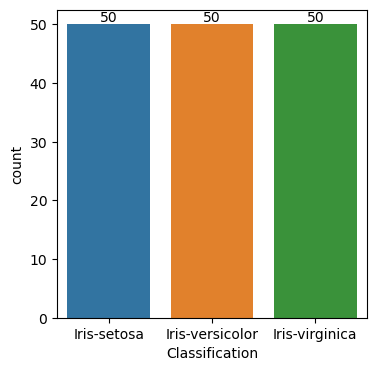

In [61]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x='Classification',data=data)
ax.bar_label(ax.containers[0])

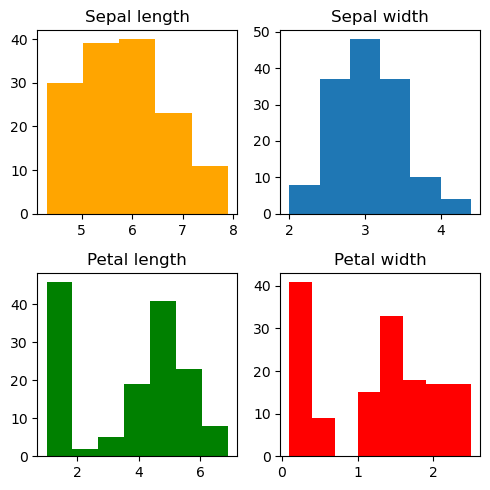

In [62]:
fig,axs = plt.subplots(2,2,figsize=(5,5))


axs[0,0].hist(data['SL'],color='orange',bins=5)
axs[0,0].set_title('Sepal length')


axs[0,1].hist(data['SW'],bins=6)
axs[0,1].set_title('Sepal width')

axs[1,0].hist(data['PL'],color='green',bins=7)
axs[1,0].set_title('Petal length')

axs[1,1].hist(data['PW'],color='red',bins=8)
axs[1,1].set_title('Petal width')

plt.tight_layout()

plt.show()

C:\Users\arund\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 200x200 with 0 Axes>

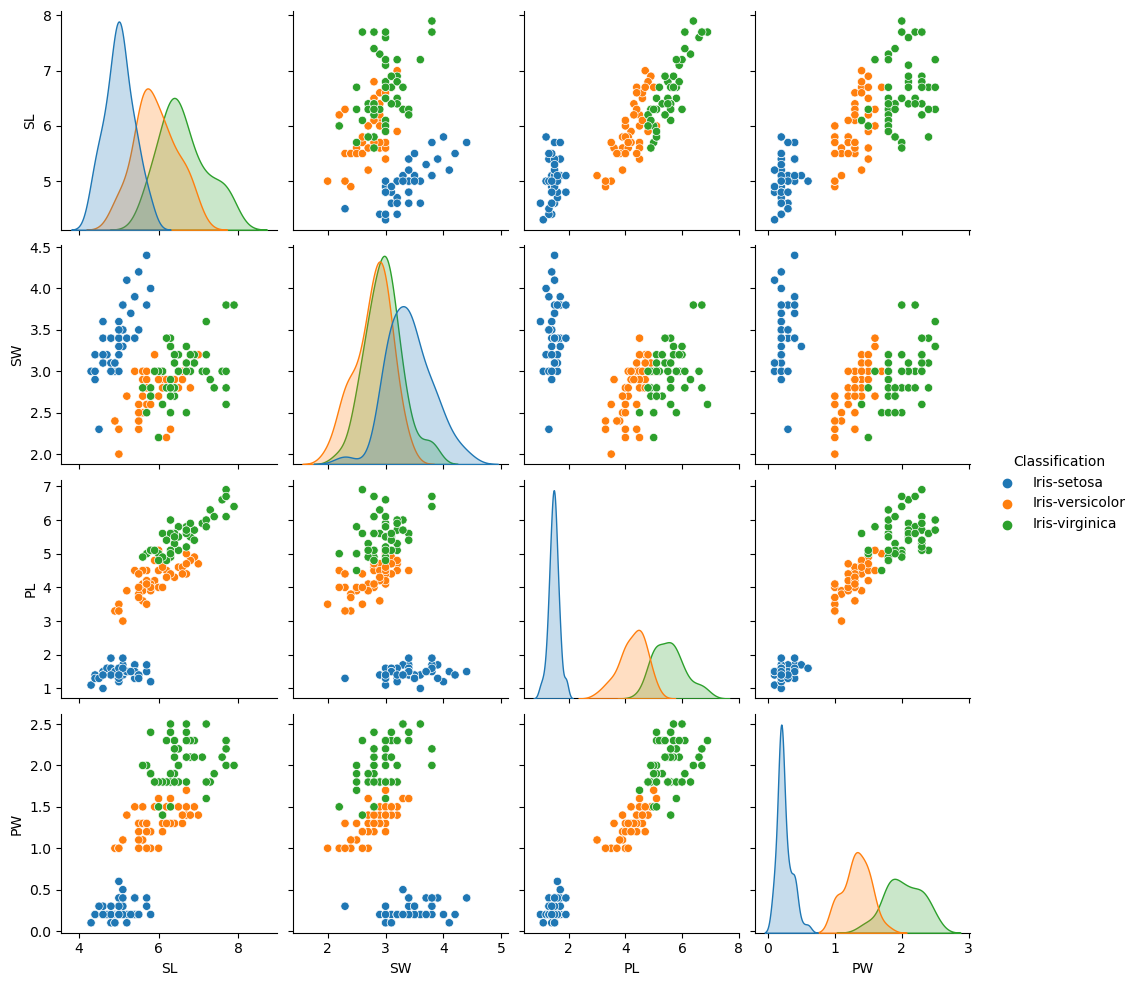

In [63]:
plt.figure(figsize=(2,2))
sns.pairplot(data,hue='Classification');

From all the plots it is clear that iris-setosa is completely differentiable from the other two classes

## Handling Missing values

In [64]:
features = ['SL','SW','PL']


for i in features:
    data[i] = data[i].fillna(data[i].median())
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Checking and handling outliers

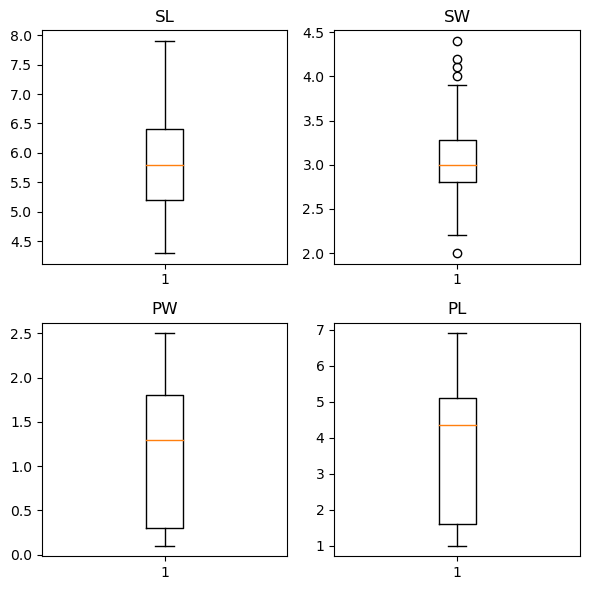

In [66]:
fig,axs = plt.subplots(2,2,figsize=(6,6))

axs[0,0].boxplot(data['SL'])
axs[0,0].set_title('SL')


axs[0,1].boxplot(data['SW'])
axs[0,1].set_title('SW')


axs[1,0].boxplot(data['PW'])
axs[1,0].set_title('PW')


axs[1,1].boxplot(data['PL'])
axs[1,1].set_title('PL')


plt.tight_layout()

plt.show()

In [67]:
Q1 = np.percentile(data['SW'],25,method='midpoint')
Q2 = np.percentile(data['SW'],50,method='midpoint')
Q3 = np.percentile(data['SW'],75,method='midpoint')

In [68]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  2.8
Q2 is  3.0
Q3 is  3.25


In [69]:
IQR = Q3-Q1
IQR

0.4500000000000002

In [70]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  2.1249999999999996
upper limit is  3.9250000000000003


In [71]:
outlier=[]
for x in data['SW']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [72]:
data['SW'] = data['SW'].clip(lower=low_lim , upper=up_lim)

In [73]:
outlier=[]
for x in data['SW']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

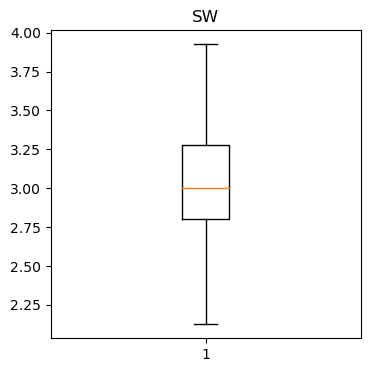

In [74]:
plt.figure(figsize=(4,4))
plt.boxplot(data['SW'])
plt.title('SW')
plt.show();

## Splitting the data

In [75]:
y = data['Classification']
X = data.drop(['Classification'],axis=1)

In [76]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
X_train.shape

(105, 4)

In [82]:
X_test.shape

(45, 4)

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

C:\Users\arund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [85]:
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score
print('Accuracy is ' , accuracy_score(y_test,y_pred))

Accuracy is  0.9777777777777777


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [87]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

## K - NN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

In [89]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

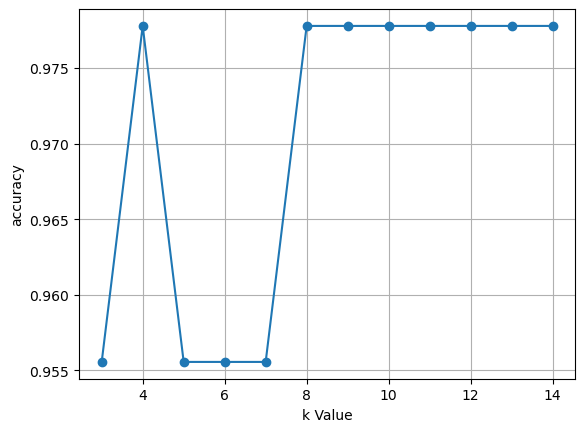

In [90]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [91]:
classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))


Accuracy is 0.9777777777777777


In [92]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [93]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski',p=1) 
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))



Accuracy is 0.9777777777777777


In [94]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))


Accuracy is 0.9777777777777777


## SVM

In [95]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(X_train,y_train)
y_svm_prediction = svm_clf.predict(X_test)

In [96]:
print(confusion_matrix(y_test,y_svm_prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [97]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction))

Accuracy is 1.0


In [98]:
svm_clf1 = SVC(kernel = 'rbf')
svm_clf1.fit(X_train,y_train)
y_svm_prediction1 = svm_clf1.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction1))


[[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


In [99]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction1))

Accuracy is 0.9777777777777777


In [100]:
svm_clf2 = SVC(kernel = 'poly')
svm_clf2.fit(X_train,y_train)
y_svm_prediction2 = svm_clf2.predict(X_test)
print(confusion_matrix(y_test,y_svm_prediction2))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [101]:
print('Accuracy is', accuracy_score(y_test, y_svm_prediction2))

Accuracy is 0.9777777777777777


## Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
ds_clf = DecisionTreeClassifier(criterion='entropy')
ds_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [103]:
y_pred_dt = ds_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_dt))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [104]:
print('Accuracy is', accuracy_score(y_test, y_pred_dt))

Accuracy is 1.0


## Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
y_pred_rf = rf_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [107]:
print('Accuracy is', accuracy_score(y_test, y_pred_rf))

Accuracy is 1.0


All the classification models almost gives best results.Random forest classifier,Decision tree classifier and SVM using linear kernel gives accuracy 1,and all others gives accuracy 0.97.